### Importação dos dados



In [1]:
import pandas as pd

# URLs dos arquivos CSV para cada loja
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carrega os arquivos CSV em DataFrames do pandas
loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Exibe as primeiras linhas do primeiro DataFrame para verificar os dados
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
# Calcula o faturamento total para cada loja somando a coluna 'Preço'
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Calcula o faturamento total para todas as quatro lojas combinadas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4

# Imprime o faturamento de cada loja e o faturamento total
print(f"Faturamento da Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento da Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento da Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento da Loja 4: R${faturamento_loja4:.2f}")
print(f"Faturamento Total das Quatro Lojas: R${faturamento_total:.2f}")

Faturamento da Loja 1: R$1534509.12
Faturamento da Loja 2: R$1488459.06
Faturamento da Loja 3: R$1464025.03
Faturamento da Loja 4: R$1384497.58
Faturamento Total das Quatro Lojas: R$5871490.79


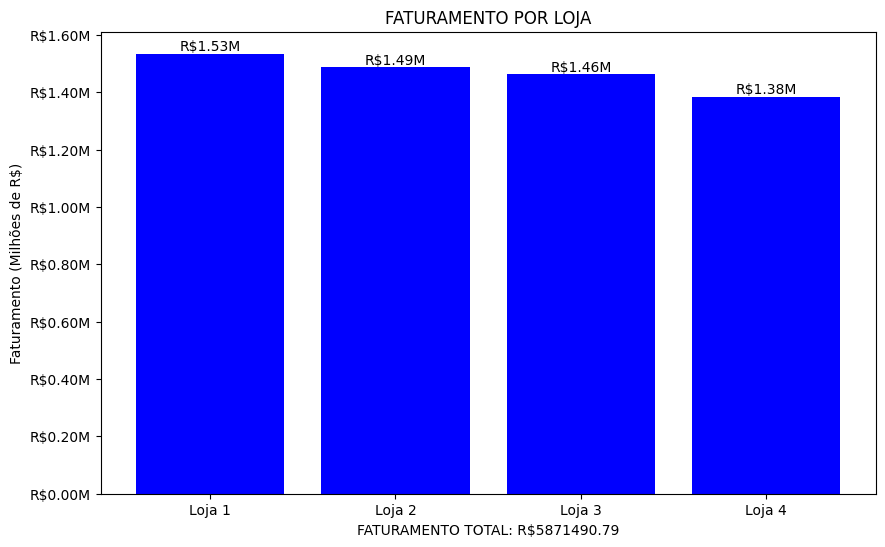

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Cria um dicionário com os dados de faturamento de cada loja
faturamento_data = {
    'Loja 1': faturamento_loja1,
    'Loja 2': faturamento_loja2,
    'Loja 3': faturamento_loja3,
    'Loja 4': faturamento_loja4
}

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))

# Reduz os valores para facilitar a formatação
bars = plt.bar(faturamento_data.keys(), [value / 1_000_000 for value in faturamento_data.values()], color='blue')
plt.title('FATURAMENTO POR LOJA', color='black')
plt.xlabel(f'FATURAMENTO TOTAL: R${faturamento_total:.2f}', color='black')
plt.ylabel('Faturamento (Milhões de R$)', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')

# Formata os rótulos do eixo y como valores monetários em milhões
formatter = mticker.FormatStrFormatter('R$%1.2fM')
plt.gca().yaxis.set_major_formatter(formatter)

# Adiciona os valores de faturamento em cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R${yval:.2f}M', va='bottom', ha='center', color='black')

plt.show()

# 2. Vendas por Categoria


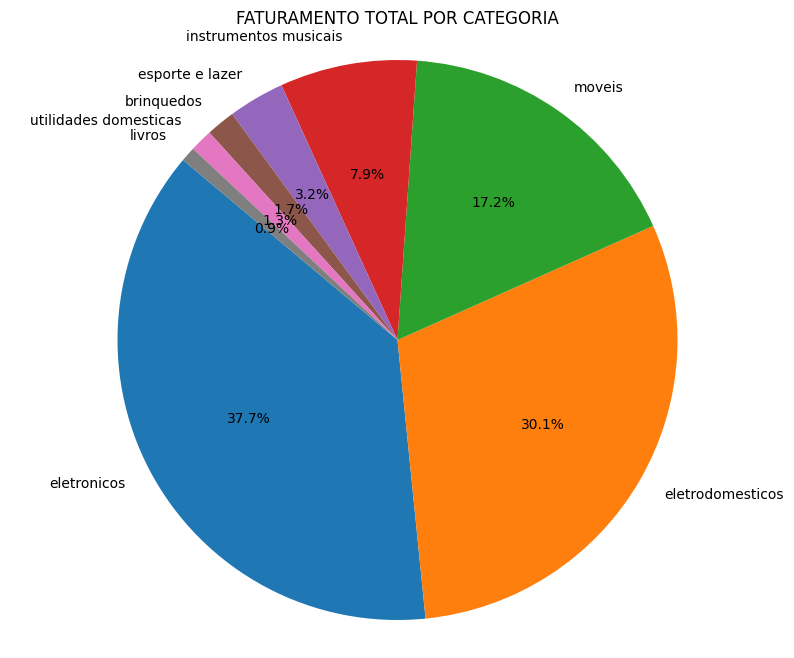

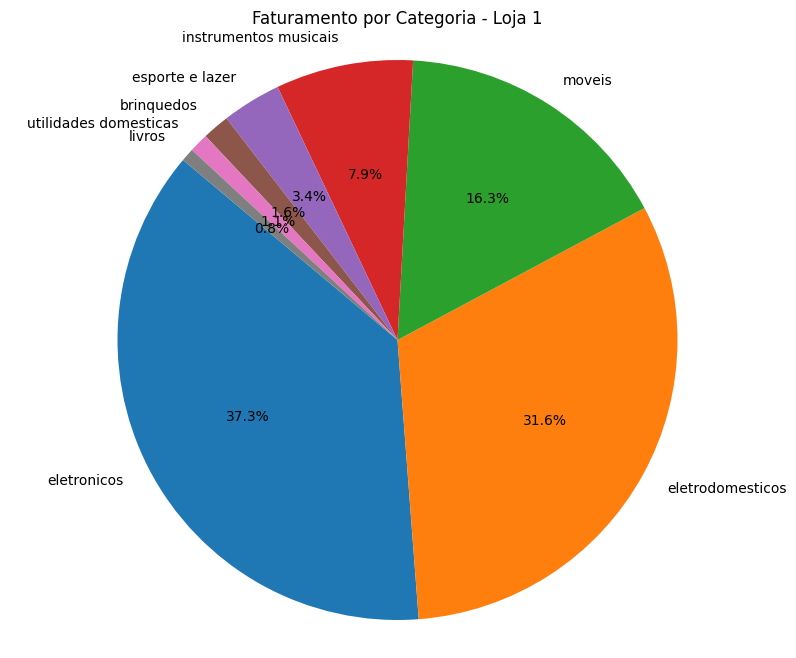

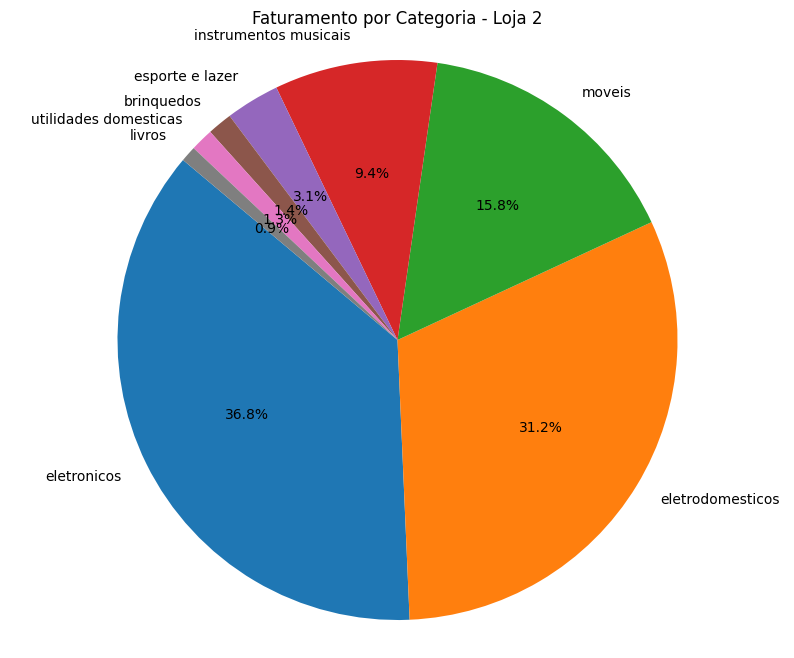

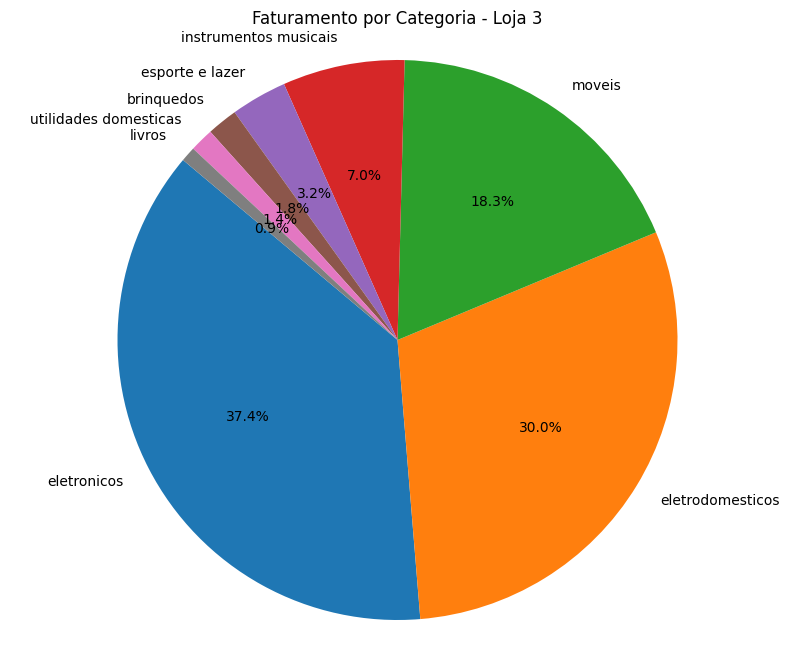

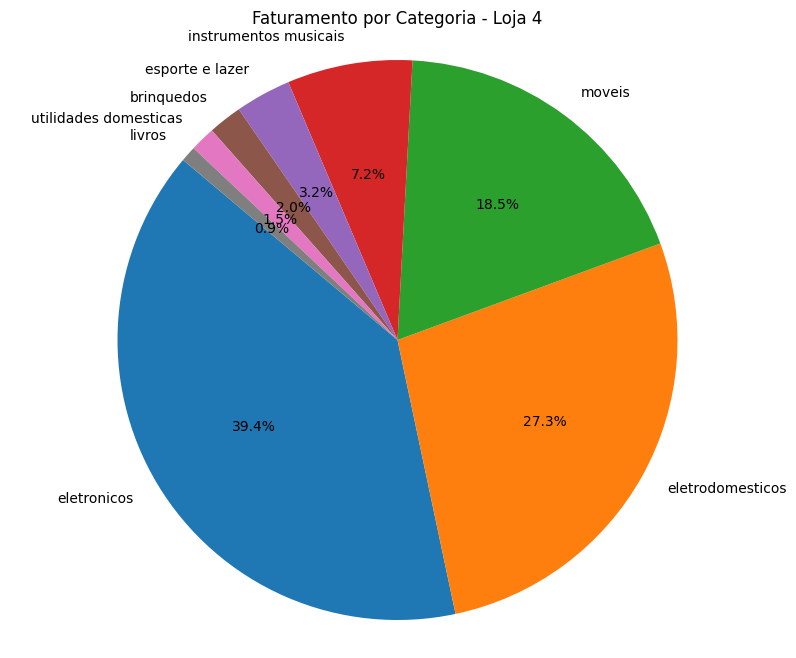

In [4]:
import matplotlib.pyplot as plt

# Agrupa por 'Categoria do Produto' e soma o 'Preço' para cada loja
faturamento_categoria_loja1 = loja.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
faturamento_categoria_loja2 = loja2.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
faturamento_categoria_loja3 = loja3.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
faturamento_categoria_loja4 = loja4.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Concatena todos os arquivos e agrupa por 'Categoria do Produto' e soma o 'Preço'
faturamento_categoria_total = pd.concat([loja, loja2, loja3, loja4]).groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

# Cria e exibe o gráfico de pizza para o faturamento por categoria total
plt.figure(figsize=(10, 8))
plt.pie(faturamento_categoria_total, labels=faturamento_categoria_total.index, autopct='%1.1f%%', startangle=140)
plt.title('FATURAMENTO TOTAL POR CATEGORIA', color='black')
plt.axis('equal')
plt.show()

# Cria e exibe gráficos de pizza para cada loja com o faturamento por categoria
Lojas = {'Loja 1': faturamento_categoria_loja1, 'Loja 2': faturamento_categoria_loja2, 'Loja 3': faturamento_categoria_loja3, 'Loja 4': faturamento_categoria_loja4}
for nome_loja, dados_faturamento in Lojas.items():
  plt.figure(figsize=(10, 8))
  plt.pie(dados_faturamento, labels=dados_faturamento.index, autopct='%1.1f%%', startangle=140)
  plt.title(f'Faturamento por Categoria - {nome_loja}', color='black')
  plt.axis('equal')
  plt.show()

In [5]:
# Imprime as 3 categorias mais vendidas de cada loja
print("3 Categorias Mais Vendidas - Loja 1:")
display(faturamento_categoria_loja1.head(3))

print("\n3 Categorias Mais Vendidas - Loja 2:")
display(faturamento_categoria_loja2.head(3))

print("\n3 Categorias Mais Vendidas - Loja 3:")
display(faturamento_categoria_loja3.head(3))

print("\n3 Categorias Mais Vendidas - Loja 4:")
display(faturamento_categoria_loja4.head(3))

3 Categorias Mais Vendidas - Loja 1:


,Preço
Categoria do Produto,
eletronicos,572659.23
eletrodomesticos,484913.36
moveis,250178.11



3 Categorias Mais Vendidas - Loja 2:


,Preço
Categoria do Produto,
eletronicos,547773.71
eletrodomesticos,464758.13
moveis,235234.68



3 Categorias Mais Vendidas - Loja 3:


,Preço
Categoria do Produto,
eletronicos,547699.92
eletrodomesticos,438984.89
moveis,268095.56



3 Categorias Mais Vendidas - Loja 4:


,Preço
Categoria do Produto,
eletronicos,545966.86
eletrodomesticos,377680.65
moveis,256705.65


# 3. Média de Avaliação das Lojas

In [8]:
# Calcula a média de avaliação para cada loja
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Calcula a média de avaliação total
media_avaliacao_total = pd.concat([loja, loja2, loja3, loja4])['Avaliação da compra'].mean()

# Imprime a média de avaliação para cada loja e a média total
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: R${media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: R${media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: R${media_avaliacao_loja4:.2f}")
print(f"Média de Avaliação - Total das Quatro Lojas: R${media_avaliacao_total:.2f}")

Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: R$4.04
Média de Avaliação - Loja 3: R$4.05
Média de Avaliação - Loja 4: R$4.00
Média de Avaliação - Total das Quatro Lojas: R$4.01


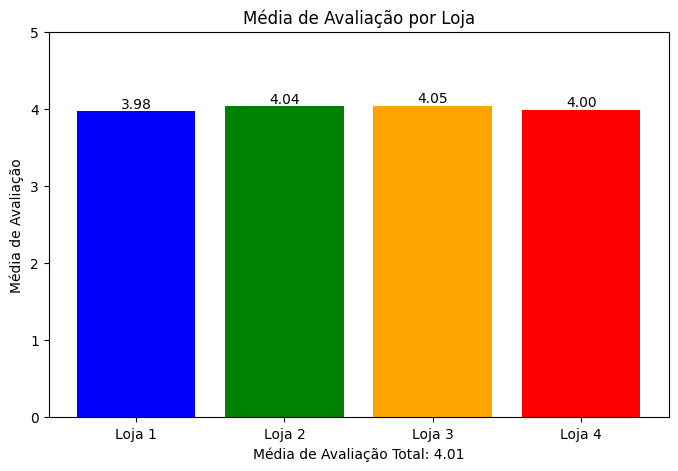

In [10]:
import matplotlib.pyplot as plt

# Cria um dicionário com os dados de média de avaliação
media_avaliacao_data = {
    'Loja 1': media_avaliacao_loja1,
    'Loja 2': media_avaliacao_loja2,
    'Loja 3': media_avaliacao_loja3,
    'Loja 4': media_avaliacao_loja4
}

# Cria o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(media_avaliacao_data.keys(), media_avaliacao_data.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Média de Avaliação por Loja', color='black')
plt.xlabel(f'Média de Avaliação Total: {media_avaliacao_total:.2f}', color='black')
plt.ylabel('Média de Avaliação', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')
plt.ylim(0, 5)

# Adiciona os valores de média de avaliação em cima das barras
for bar in plt.gca().patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', color='black')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [11]:
# Concatena todos os DataFrames
total_produtos_df = pd.concat([loja, loja2, loja3, loja4])

# Conta a quantidade de produtos únicos
quantidade_produtos = total_produtos_df['Produto'].nunique()

# Imprime a quantidade de produtos
print(f"Quantidade total de produtos existentes: {quantidade_produtos}")

Quantidade total de produtos existentes: 51


In [12]:
# Produtos mais vendidos por loja
produtos_mais_vendidos_loja1 = loja.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
produtos_mais_vendidos_loja2 = loja2.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
produtos_mais_vendidos_loja3 = loja3.groupby('Produto')['Preço'].sum().sort_values(ascending=False)
produtos_mais_vendidos_loja4 = loja4.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# Produtos menos vendidos por loja
produtos_menos_vendidos_loja1 = loja.groupby('Produto')['Preço'].sum().sort_values(ascending=True)
produtos_menos_vendidos_loja2 = loja2.groupby('Produto')['Preço'].sum().sort_values(ascending=True)
produtos_menos_vendidos_loja3 = loja3.groupby('Produto')['Preço'].sum().sort_values(ascending=True)
produtos_menos_vendidos_loja4 = loja4.groupby('Produto')['Preço'].sum().sort_values(ascending=True)

# Produtos mais vendidos no total
produtos_mais_vendidos_total = pd.concat([loja, loja2, loja3, loja4]).groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# Produtos menos vendidos no total
produtos_menos_vendidos_total = pd.concat([loja, loja2, loja3, loja4]).groupby('Produto')['Preço'].sum().sort_values(ascending=True)


# Exibe os 3 produtos mais e menos vendidos por loja
print("Loja 1:")
print("Mais Vendidos:")
display(produtos_mais_vendidos_loja1.head(3))
print("\nMenos Vendidos:")
display(produtos_menos_vendidos_loja1.head(3))

print("Loja 2:")
print("Mais Vendidos:")
display(produtos_mais_vendidos_loja2.head(3))
print("\nMenos Vendidos:")
display(produtos_menos_vendidos_loja2.head(3))

print("Loja 3:")
print("Mais Vendidos:")
display(produtos_mais_vendidos_loja3.head(3))
print("\nMenos Vendidos:")
display(produtos_menos_vendidos_loja3.head(3))

print("\Loja 4:")
print("Mais Vendidos:")
display(produtos_mais_vendidos_loja4.head(3))
print("\nMenos Vendidos:")
display(produtos_menos_vendidos_loja4.head(3))

print("Total das Quatro Lojas:")
print("Mais Vendidos:")
display(produtos_mais_vendidos_total.head(3))
print("\nMenos Vendidos:")
display(produtos_menos_vendidos_total.head(3))

Loja 1:
Mais Vendidos:


,Preço
Produto,
TV Led UHD 4K,189534.28
Geladeira,149524.28
Celular Plus X42,130536.40



Menos Vendidos:


,Preço
Produto,
Corda de pular,870.89
Dinossauro Rex,918.40
Cubo mágico 8x8,929.27


Loja 2:
Mais Vendidos:


,Preço
Produto,
Celular Plus X42,150967.83
TV Led UHD 4K,137833.06
Geladeira,130176.48



Menos Vendidos:


,Preço
Produto,
Cubo mágico 8x8,858.22
Dinossauro Rex,1027.41
Corda de pular,1142.54


Loja 3:
Mais Vendidos:


,Preço
Produto,
Geladeira,133185.99
TV Led UHD 4K,128892.11
Celular Plus X42,124300.84



Menos Vendidos:


,Preço
Produto,
Cubo mágico 8x8,853.81
Dinossauro Rex,1060.78
Corda de pular,1137.76


\Loja 4:
Mais Vendidos:


,Preço
Produto,
Celular Plus X42,128930.07
TV Led UHD 4K,120393.25
Smart TV,110387.57



Menos Vendidos:


,Preço
Produto,
Corda de pular,939.74
Cubo mágico 8x8,997.38
Dinossauro Rex,1143.94


Total das Quatro Lojas:
Mais Vendidos:


,Preço
Produto,
TV Led UHD 4K,576652.70
Celular Plus X42,534735.14
Geladeira,513249.34



Menos Vendidos:


,Preço
Produto,
Cubo mágico 8x8,3638.68
Corda de pular,4090.93
Dinossauro Rex,4150.53


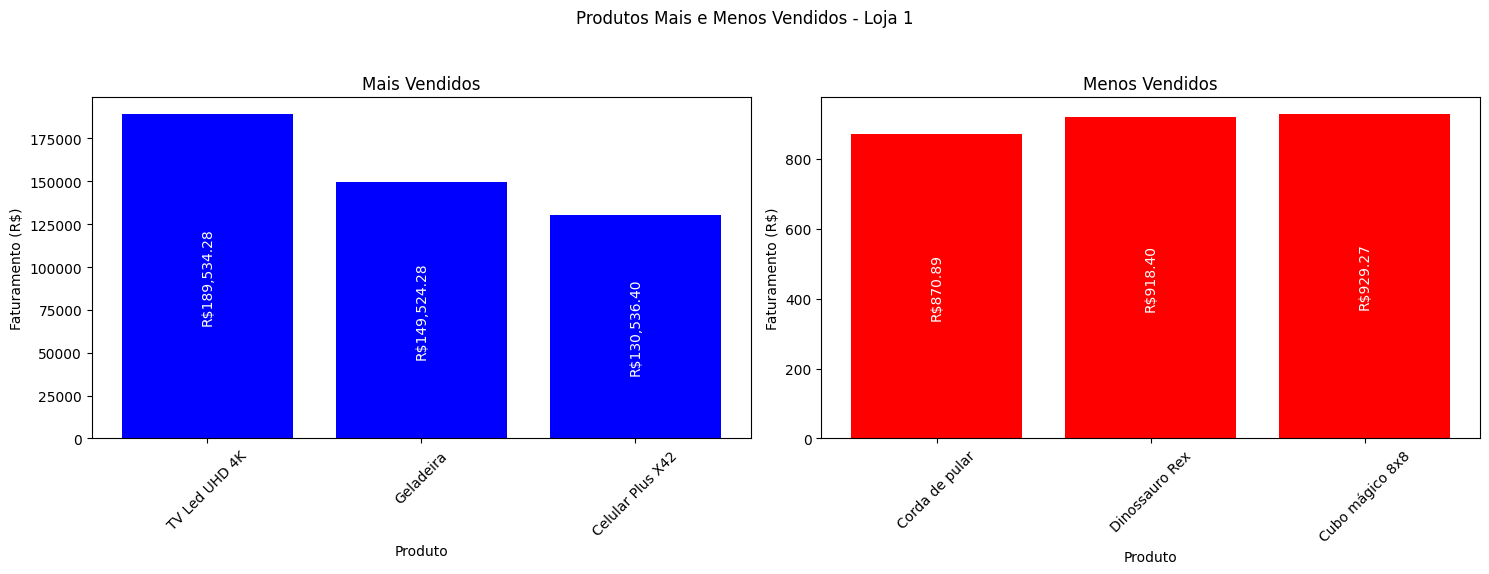

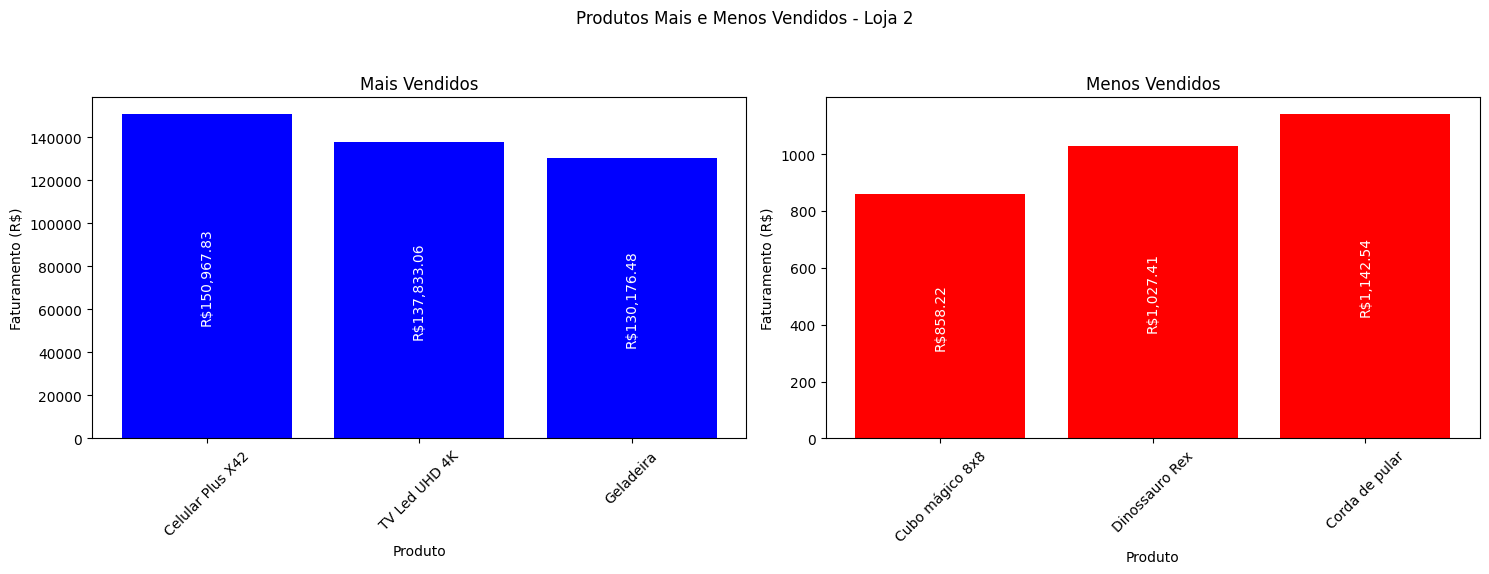

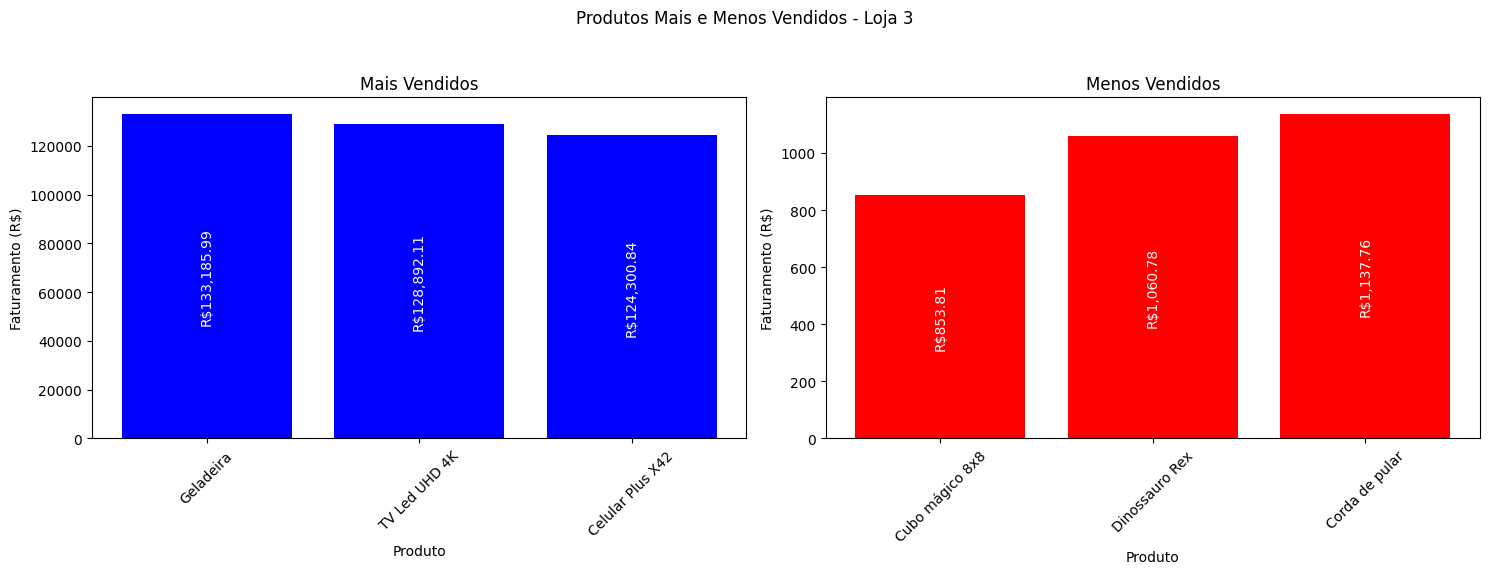

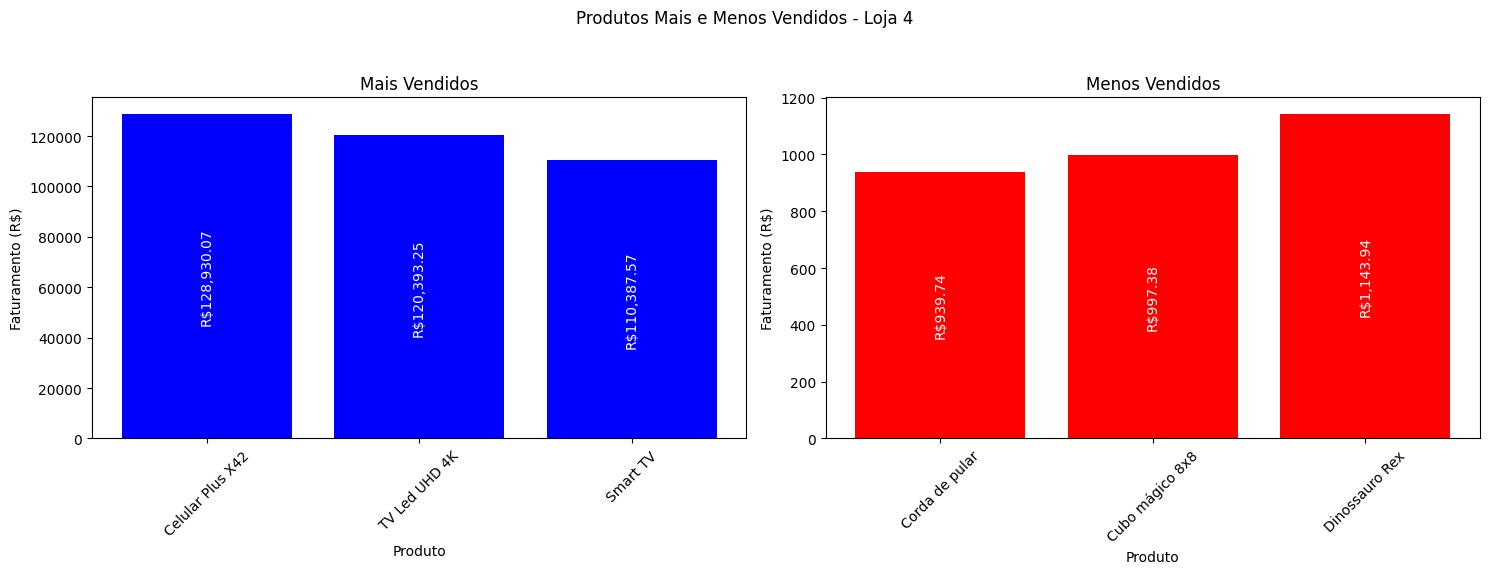

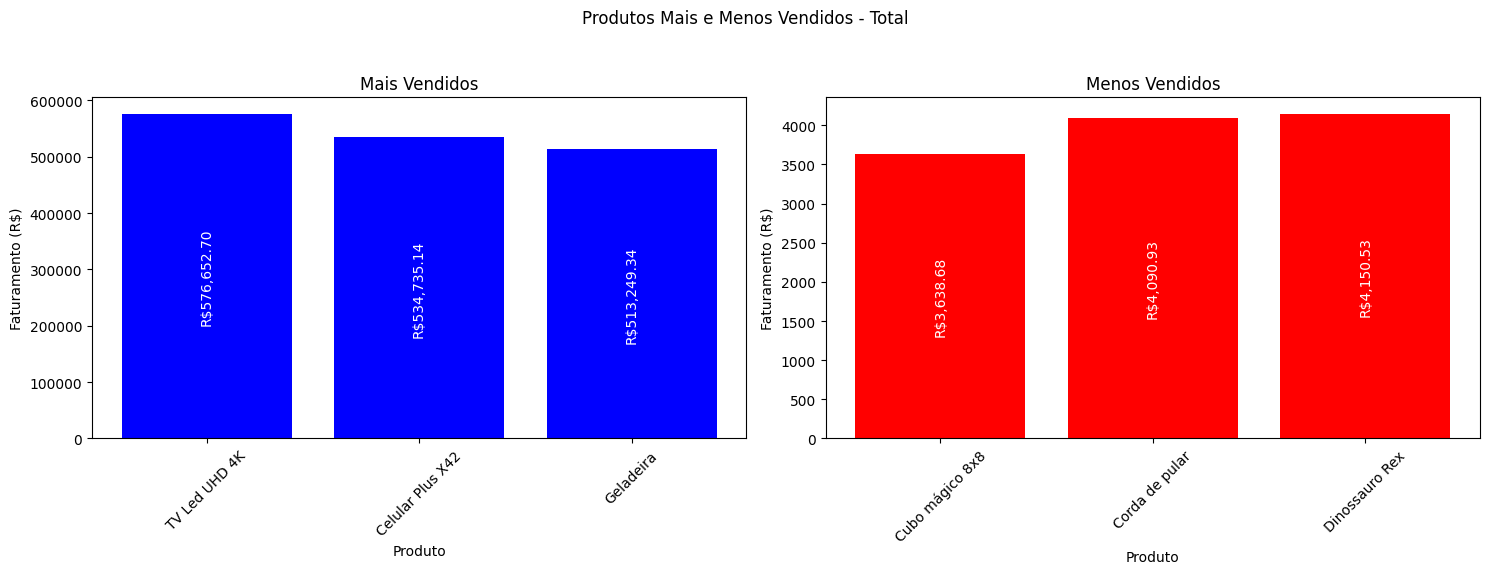

In [13]:
import matplotlib.pyplot as plt

# Função para criar gráficos de barras para produtos mais e menos vendidos
def plot_product_sales(data_mais_vendidos, data_menos_vendidos, title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(title, color='black')

    # Plota produtos mais vendidos
    bars_mais = axes[0].bar(data_mais_vendidos.index, data_mais_vendidos.values, color='blue')
    axes[0].set_title('Mais Vendidos', color='black')
    axes[0].set_xlabel('Produto', color='black')
    axes[0].set_ylabel('Faturamento (R$)', color='black')
    axes[0].tick_params(axis='x', rotation=45, colors='black')
    axes[0].tick_params(axis='y', colors='black')
    axes[0].set_facecolor('white')

    # Adiciona os valores de faturamento em cada barra de mais vendidos
    for bar in bars_mais:
        yval = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2, yval/2, f'R${yval:,.2f}', va='center', ha='center', color='white', rotation=90) # Adjusted vertical alignment and color

    # Plota produtos menos vendidos
    bars_menos = axes[1].bar(data_menos_vendidos.index, data_menos_vendidos.values, color='red')
    axes[1].set_title('Menos Vendidos', color='black')
    axes[1].set_xlabel('Produto', color='black')
    axes[1].set_ylabel('Faturamento (R$)', color='black')
    axes[1].tick_params(axis='x', rotation=45, colors='black')
    axes[1].tick_params(axis='y', colors='black')
    axes[1].set_facecolor('white')

    # Adiciona os valores de faturamento em cada barra de menos vendidos
    for bar in bars_menos:
        yval = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2, yval/2, f'R${yval:,.2f}', va='center', ha='center', color='white', rotation=90) # Adjusted vertical alignment and color


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Plota para cada loja
plot_product_sales(produtos_mais_vendidos_loja1.head(3), produtos_menos_vendidos_loja1.head(3), 'Produtos Mais e Menos Vendidos - Loja 1')
plot_product_sales(produtos_mais_vendidos_loja2.head(3), produtos_menos_vendidos_loja2.head(3), 'Produtos Mais e Menos Vendidos - Loja 2')
plot_product_sales(produtos_mais_vendidos_loja3.head(3), produtos_menos_vendidos_loja3.head(3), 'Produtos Mais e Menos Vendidos - Loja 3')
plot_product_sales(produtos_mais_vendidos_loja4.head(3), produtos_menos_vendidos_loja4.head(3), 'Produtos Mais e Menos Vendidos - Loja 4')

# Plota para o total
plot_product_sales(produtos_mais_vendidos_total.head(3), produtos_menos_vendidos_total.head(3), 'Produtos Mais e Menos Vendidos - Total')

# 5. Frete Médio por Loja


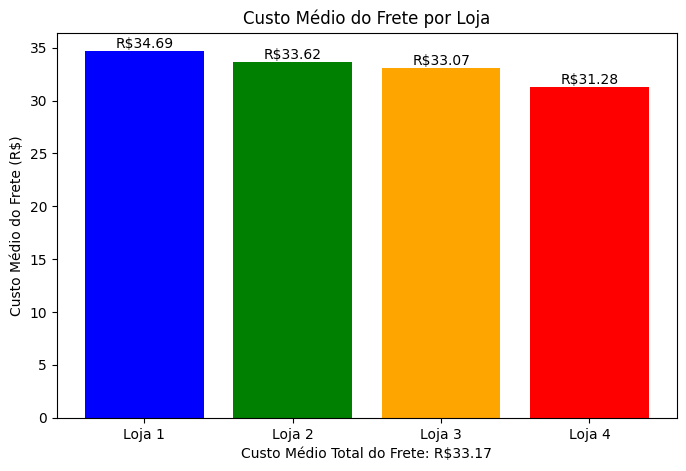

In [17]:
import matplotlib.pyplot as plt

# Calcula o custo médio do frete para cada loja
media_frete_loja1 = loja['Frete'].mean()
media_frete_loja2 = loja2['Frete'].mean()
media_frete_loja3 = loja3['Frete'].mean()
media_frete_loja4 = loja4['Frete'].mean()

# Calcula o custo médio total do frete
media_frete_total = pd.concat([loja, loja2, loja3, loja4])['Frete'].mean()

# Cria um dicionário com os dados de custo médio do frete
media_frete_data = {
    'Loja 1': media_frete_loja1,
    'Loja 2': media_frete_loja2,
    'Loja 3': media_frete_loja3,
    'Loja 4': media_frete_loja4
}

# Cria o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(media_frete_data.keys(), media_frete_data.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Custo Médio do Frete por Loja', color='black')
plt.xlabel(f'Custo Médio Total do Frete: R${media_frete_total:.2f}', color='black')
plt.ylabel('Custo Médio do Frete (R$)', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white')

# Adiciona os valores de custo médio do frete em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'R${yval:.2f}',
             ha='center', va='bottom', color='black')

plt.show()

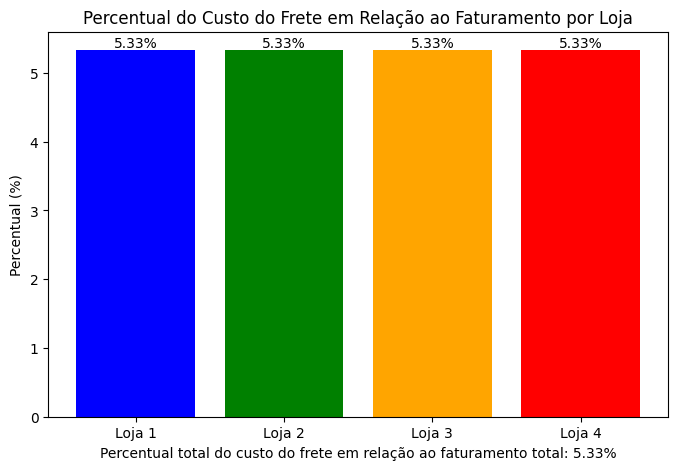

In [24]:
# Calcula o percentual do custo do frete em relação ao faturamento para cada loja
percentual_frete_loja1 = (loja['Frete'].sum() / loja['Preço'].sum()) * 100
percentual_frete_loja2 = (loja2['Frete'].sum() / loja2['Preço'].sum()) * 100
percentual_frete_loja3 = (loja3['Frete'].sum() / loja3['Preço'].sum()) * 100
percentual_frete_loja4 = (loja4['Frete'].sum() / loja4['Preço'].sum()) * 100

# Calcula o percentual do custo do frete em relação ao faturamento total
percentual_frete_total = (pd.concat([loja, loja2, loja3, loja4])['Frete'].sum() / pd.concat([loja, loja2, loja3, loja4])['Preço'].sum()) * 100

# Cria um dicionário com os dados percentuais
percentual_frete_data = {
    'Loja 1': percentual_frete_loja1,
    'Loja 2': percentual_frete_loja2,
    'Loja 3': percentual_frete_loja3,
    'Loja 4': percentual_frete_loja4
}

# Cria um gráfico de barras para o percentual do custo do frete por loja
plt.figure(figsize=(8, 5))
bars = plt.bar(percentual_frete_data.keys(), percentual_frete_data.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Percentual do Custo do Frete em Relação ao Faturamento por Loja', color='black')
plt.xlabel(f"Percentual total do custo do frete em relação ao faturamento total: {percentual_frete_total:.2f}%", color='black')
plt.ylabel('Percentual (%)', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('white') # Define a cor de fundo

# Adiciona os valores percentuais em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%',
             ha='center', va='bottom', color='black')

plt.show()





# 6. Análise de Desempenho Geográfico

In [43]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Concatena todos os DataFrames
df_vendas_total = pd.concat([loja, loja2, loja3, loja4])

# Cria um mapa centrado na média das localizações
mapa_calor = folium.Map(location=[df_vendas_total['lat'].mean(), df_vendas_total['lon'].mean()], zoom_start=4)

# Prepara os dados para o mapa de calor (lista de [latitude, longitude])
data_calor = [[row['lat'], row['lon']] for index, row in df_vendas_total.iterrows()]

# Adiciona a camada de mapa de calor ao mapa
HeatMap(data_calor).add_to(mapa_calor)

# Exibe o mapa de calor
mapa_calor

In [47]:
import pandas as pd

# Calcula o número de vendas por estado para cada loja
vendas_por_estado_loja1 = loja['Local da compra'].value_counts().sort_index()
vendas_por_estado_loja2 = loja2['Local da compra'].value_counts().sort_index()
vendas_por_estado_loja3 = loja3['Local da compra'].value_counts().sort_index()
vendas_por_estado_loja4 = loja4['Local da compra'].value_counts().sort_index()

# Cria DataFrames para cada loja e renomeia a coluna de contagem
df_vendas_loja1 = vendas_por_estado_loja1.reset_index()
df_vendas_loja1.columns = ['Estado', 'Loja 1']

df_vendas_loja2 = vendas_por_estado_loja2.reset_index()
df_vendas_loja2.columns = ['Estado', 'Loja 2']

df_vendas_loja3 = vendas_por_estado_loja3.reset_index()
df_vendas_loja3.columns = ['Estado', 'Loja 3']

df_vendas_loja4 = vendas_por_estado_loja4.reset_index()
df_vendas_loja4.columns = ['Estado', 'Loja 4']

# Junta os DataFrames de cada loja em um único DataFrame
vendas_por_estado_todas_lojas = df_vendas_loja1.merge(df_vendas_loja2, on='Estado', how='outer').merge(
    df_vendas_loja3, on='Estado', how='outer').merge(df_vendas_loja4, on='Estado', how='outer').fillna(0).set_index('Estado')

# Imprime a tabela
print("Número de Vendas por Estado para Cada Loja:")
display(vendas_por_estado_todas_lojas.astype(int))

Número de Vendas por Estado para Cada Loja:


,Loja 1,Loja 2,Loja 3,Loja 4
Estado,,,,
AC,1,1,1,0
AL,15,13,7,6
AM,3,4,3,4
AP,4,0,2,3
BA,75,78,77,80
CE,32,40,44,35
DF,53,70,56,63
ES,38,34,57,42
GO,51,59,44,32


# RELATÓRIO FINAL

Este relatório tem como objetivo apresentar uma análise comparativa de desempenho entre as quatro unidades comerciais da Alura Store Brasil, com o objetivo de subsidiar uma decisão estratégica sobre qual loja deve ser vendida. A avaliação considera diversos indicadores de desempenho extraídos dos dados disponíveis, incluindo: faturamento, categorias de produtos mais e menos vendidos, avaliação média dos clientes, produtos com maior e menor receita, e custo médio de frete. A decisão será fundamentada em critérios quantitativos e qualitativos, com apoio das visualizações gráficas geradas ao longo do processo.

---

### **Desenvolvimento da Análise**

#### **1. Faturamento Total**

Os dados mostram que a Loja 1 possui o maior faturamento total, com **R\$ 1.534.509,12**, representando aproximadamente 26% da receita da rede. Em contraste, a Loja 4 apresenta o menor faturamento: **R\$ 1.384.497,58**, cerca de 23,6% do total.

#### **2. Categorias de Produtos Mais Vendidas**

Em todas as lojas, os produtos mais vendidos concentram-se em três categorias: **eletrônicos**, **eletrodomésticos** e **móveis**. A Loja 1 se destaca com a maior receita em todas essas categorias. A Loja 4, apesar de seguir o mesmo padrão de categorias, registra os menores valores absolutos.

#### **3. Avaliação Média dos Clientes**

A média geral de avaliação das quatro lojas é **4,01**. A Loja 3 lidera com **4,05**, seguida pela Loja 2 com **4,04**. A Loja 4 fica abaixo da média, com **4,00**, e a Loja 1 registra a pior nota, com **3,98**.

#### **4. Produtos Mais e Menos Vendidos**

Os produtos com maior receita em todas as lojas incluem:

* **TV Led UHD 4K**
* **Celular Plus X42**
* **Geladeira**

A Loja 4 arrecada menos que as demais nesses produtos de alto ticket, por outro lado, os produtos com menor receita são:

* **Cubo mágico 8x8**
* **Corda de pular**
* **Dinossauro Rex**

Esses produtos apresentam baixa rotatividade em todas as lojas, não influenciando significativamente a análise de decisão.

#### **5. Frete Médio por Loja**

A análise do custo médio de frete por loja revela diferenças relevantes no desempenho logístico das unidades. A Loja 4 apresenta o maior frete médio entre as quatro lojas, o que impacta negativamente sua margem operacional e a percepção de custo-benefício pelos clientes. Por outro lado, a Loja 2 demonstra maior eficiência logística, com o menor valor médio de frete, contribuindo positivamente para a experiência de compra e fidelização.

Considerando que o frete representa um componente sensível na decisão de compra do consumidor, especialmente no comércio eletrônico, o desempenho inferior da Loja 4 neste aspecto reforça sua desvantagem competitiva. A presença de fretes mais elevados pode inibir conversões e reduzir a atratividade da loja em relação às concorrentes, além de sinalizar fragilidades na cadeia de suprimentos ou localização desfavorável.

#### **6. Análise de Desempenho Geográfico**

A análise indica que a Loja 4 tem menor capilaridade geográfica, especialmente em regiões remotas, o que compromete seu potencial de crescimento nacional.
Em contrapartida, a Loja 1 revela maior robustez distributiva, o que pode representar um diferencial competitivo em estratégias omnichannel ou de expansão logística.

Futuros investimentos em marketing regional, parcerias com operadores logísticos locais e políticas de frete subsidiado podem corrigir assimetrias de penetração regional.

---

### **Conclusão e Recomendação**

Com base nos dados analisados e nas visualizações geradas, recomenda-se a venda da Loja 4. Esta unidade apresenta os seguintes pontos fracos:

* **Menor faturamento total absoluto**
* **Avaliação de clientes abaixo da média**
* **Menor relevância financeira nas principais categorias de venda**
* **Nenhum diferencial competitivo em relação às demais unidades**

Vender a Loja 4 representa uma decisão financeiramente embasada, que não comprometerá o mix comercial da empresa devido a similaridade entre as lojas.Além disso, proporcionará liquidez imediata e permitirá a concentração de esforços em unidades com melhor performance.